In [16]:
!pip install "ultralytics<=8.3.40"
!pip install roboflow

In [17]:
from roboflow import Roboflow
from ultralytics import YOLO
rf = Roboflow(api_key="HHOQQa2OcXtsGddANg0W")
project = rf.workspace("robot-application").project("vehicle_detecion")
version = project.version(7)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [18]:
best = YOLO('/content/runs/detect/train/weights/best.pt')
best.val()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/Vehicle_Detecion--7/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         24        171      0.761      0.682      0.779      0.545
                   car         24        118      0.812      0.805      0.872      0.646
                 heavy         20         47      0.853      0.741      0.811      0.596
             two-wheel          4          6      0.618        0.5      0.654      0.395
Speed: 4.0ms preprocess, 7.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78328c296770>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [26]:
results=best("/content/material/video_frame63.jpg")


image 1/1 /content/material/video_frame63.jpg: 384x640 1 car, 3 heavys, 10.8ms
Speed: 3.4ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


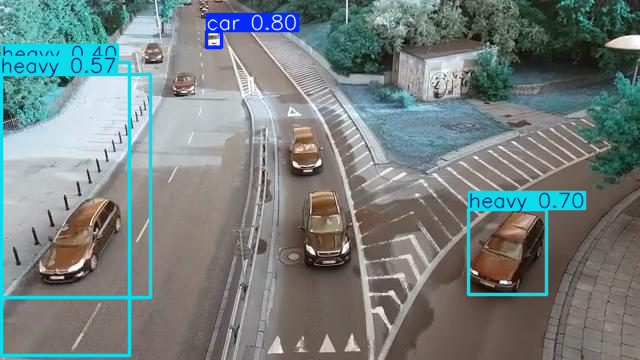

In [27]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk